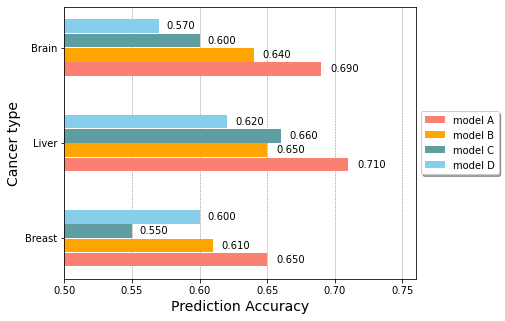

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def main():
	#### 1. bar plot으로 나타낼 데이터 입력
	models = ['model A', 'model B', 'model C', 'model D']
	yticks = ['Breast', 'Liver', 'Brain']
	data = {'model A':[0.65, 0.71, 0.69],
	        'model B':[0.61, 0.65, 0.64],
			'model C':[0.55, 0.66, 0.60],
			'model D':[0.60, 0.62, 0.57]}
	
	#### 2. matplotlib의 figure 및 axis 설정
	fig, ax = plt.subplots(1,1,figsize=(7,5)) # 1x1 figure matrix 생성, 가로(7인치)x세로(5인치) 크기지정
	colors = ['salmon', 'orange', 'cadetblue', 'skyblue']
	height = 0.15
	
	#### 3. bar 그리기
	for i, model in enumerate(models):
		pos = compute_pos(yticks, height, i, models)
		bar = ax.barh(pos, data[model], height=height*0.95, label=model, color=colors[i])
		present_width(ax, bar) # bar너비 출력
	
	#### 4. x축 세부설정
	ax.set_xlim([0.5,0.76])
	ax.set_xticks([0.5, 0.55, 0.6, 0.65, 0.7, 0.75])
	ax.xaxis.set_tick_params(labelsize=10)
	ax.set_xlabel('Prediction Accuracy', fontsize=14)
	
	#### 5. y축 세부설정
	ax.set_yticks(range(len(yticks)))
	ax.set_yticklabels(yticks, fontsize=10)	
	ax.set_ylabel('Cancer type', fontsize=14)
	
	#### 6. 범례 나타내기
	box = ax.get_position() # 범례를 그래프상자 밖에 그리기위해 상자크기를 조절
	ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
	ax.legend(loc='center left', bbox_to_anchor=(1,0.5), shadow=True, ncol=1)
	
	#### 7. 보조선(눈금선) 나타내기
	ax.set_axisbelow(True)
	ax.xaxis.grid(True, color='gray', linestyle='dashed', linewidth=0.5)
	
	#### 8. 그래프 저장하고 출력하기
	plt.savefig('ex_barhplot.png', format='png', dpi=300)
	plt.show()
	
def compute_pos(yticks, height, i, models):
	index = np.arange(len(yticks))
	n = len(models)
	correction = i - 0.5*(n-1)
	return index + height * correction

def present_width(ax, bar):
	for rect in bar:
		witdh = rect.get_width()
		posx = witdh*1.01
		posy = rect.get_y()+rect.get_height()*0.5
		ax.text(posx, posy, '%.3f' % witdh, rotation=0, ha='left', va='center')
		
if __name__=='__main__':
	main()